In [1]:
import pandas as pd
from cl_cpmm import ConcentratedLiquidity
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
pools = pd.read_csv('./pools/top250.csv', index_col=[0])

In [3]:
ADDRESS = '0x68082ecc5bbad8fe77c2cb9d0e3403d9a00ccbc2'

In [4]:
meta_pool_data = pools.loc[pools['pool_id'] == ADDRESS]

In [5]:
pool_name = meta_pool_data.pool_name.values[0] 

In [6]:
fee = pool_name.split(' ')[-1]

In [7]:
if fee == '1.0%':
    FEE = 10000
    TICK_SPACING = 200

elif fee == '0.3%':
    FEE = 3000
    TICK_SPACING = 60

elif fee == '0.05%':
    FEE = 500
    TICK_SPACING = 10

elif fee == '0.01%':
    FEE = 100
    TICK_SPACING = 1

In [8]:
direct = '/Volumes/luke-uni/data/uniswap-v3/NFT_manager'
dfs = []
for file in os.listdir(direct):
    tdf = pd.read_parquet(f'{direct}/{file}')
    dfs.append(tdf)
nft = pd.concat(dfs)


In [9]:
nft.rename({'args.tokenId':'tokenId', 'args.liquidity':'liquidity'}, axis=1, inplace=True)

In [10]:
nft

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,tokenId,liquidity,args.amount0,args.amount1,args.recipient,args.from,args.to,args.owner,args.approved,args.operator
0,DecreaseLiquidity,218,161,0xfdf8fb54828dc8a28bc0623f71f213118683a5ef02fd329b5d868ae0395e2577,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x26ff7321f0c5642b73c35dbd334c93a98585b2f7cc7122dcf89f693d4503f85c,13000001,108859.0,3.861221e+20,6.497390e+21,1.967607e+18,nan,nan,nan,nan,nan,nan
1,Collect,222,161,0xfdf8fb54828dc8a28bc0623f71f213118683a5ef02fd329b5d868ae0395e2577,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x26ff7321f0c5642b73c35dbd334c93a98585b2f7cc7122dcf89f693d4503f85c,13000001,108859.0,NaN,6.497390e+21,1.967607e+18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan
2,Transfer,438,288,0x61ae78f150a50d2f145779200bee946c5a36c54c04fe1dbba504815607ce0096,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xb21a33c3fb4904f52f7391734bbc9dd12678223c9377f38ef39f1760dad8b6c2,13000011,108867.0,NaN,NaN,NaN,nan,0x0000000000000000000000000000000000000000,0x1bB1EDfbF2D183Dbaf32557C63b6454daEc2A0e2,nan,nan,nan
3,IncreaseLiquidity,439,288,0x61ae78f150a50d2f145779200bee946c5a36c54c04fe1dbba504815607ce0096,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xb21a33c3fb4904f52f7391734bbc9dd12678223c9377f38ef39f1760dad8b6c2,13000011,108867.0,4.740894e+21,1.766912e+22,9.869782e+18,nan,nan,nan,nan,nan,nan
4,DecreaseLiquidity,194,109,0x6ebed710fd89ddf67df094fa55c67574f02f2068aa33611d5748c18e727394c4,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x29e05b6a260eab7b5eb7b1ded4db944cecb6d41217a0722946400d2cdb57265c,13000015,108202.0,1.586446e+21,1.087168e+22,4.955736e+18,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469584,DecreaseLiquidity,75,76,0xdc27e19a57fef980b6b6e3266c66010d65754271709316164bbd26dfafd3da88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xac0225e6e9657855edde02b1f6acff0d4a25ef8428c3e00af77616e632be8811,12999997,108659.0,2.745068e+16,6.094059e+16,9.608252e+14,nan,nan,nan,nan,nan,nan
469585,Collect,80,76,0xdc27e19a57fef980b6b6e3266c66010d65754271709316164bbd26dfafd3da88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xac0225e6e9657855edde02b1f6acff0d4a25ef8428c3e00af77616e632be8811,12999997,108659.0,NaN,6.129241e+16,9.660503e+14,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan
469586,DecreaseLiquidity,331,209,0x6aa8a423c336ba58fa770a72d9629ab4cf8d82856e0b5329713a9ef24d487c17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xa7494c5e38ffb0bcd279caf1ccbcad3aea47a3cf03213fd1364fbafdca706973,12999999,13665.0,6.409322e+21,1.756688e+22,0.000000e+00,nan,nan,nan,nan,nan,nan
469587,Collect,335,209,0x6aa8a423c336ba58fa770a72d9629ab4cf8d82856e0b5329713a9ef24d487c17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xa7494c5e38ffb0bcd279caf1ccbcad3aea47a3cf03213fd1364fbafdca706973,12999999,13665.0,NaN,1.766912e+22,8.488901e+17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan


In [11]:
nft['event'] = nft['event'].mask(nft['event'] == 'IncreaseLiquidity', 'Mint')
nft['event'] = nft['event'].mask(nft['event'] == 'DecreaseLiquidity', 'Burn')

In [12]:
direct = f'/Volumes/luke-uni/data/uniswap-v3/raw/{ADDRESS}'
dfs = []
for file in os.listdir(direct):
    tdf = pd.read_parquet(f'{direct}/{file}')
    dfs.append(tdf)
df = pd.concat(dfs)
df.sort_values(by = ['blockNumber', 'logIndex'], inplace=True)
df

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,args.sqrtPriceX96,args.tick,args.owner,args.tickLower,args.tickUpper,args.sender,args.amount,args.amount0,args.amount1,args.recipient,args.liquidity,args.observationCardinalityNextOld,args.observationCardinalityNextNew,args.paid0,args.paid1
0,Initialize,40,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x3cc28fcbae00df0d154d2dbdaca63b7c8f40b9fdbf8cfebeec0a0ca993ec2704,12407941,8.976328e+26,-89611.0,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN
1,Mint,45,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x3cc28fcbae00df0d154d2dbdaca63b7c8f40b9fdbf8cfebeec0a0ca993ec2704,12407941,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-90400.0,-88800.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.140942e+23,4.001643e+23,5.000000e+19,nan,NaN,NaN,NaN,NaN,NaN
2,Swap,87,129,0x68a1a4c076d618de9a8fc0deb29fcc882eddcadfe81537369cf1529f8cefb886,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xb71ab852c54b92ed3eba07ac9c7de0a75f925ef14dc03dd373b0f55cb941f1e6,12408059,8.983203e+26,-89596.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,-7.706628e+21,1.000000e+18,0xbd82fD42bf9ccFa1Bd97FF9aD9B4fa7D5dD54A25,1.140942e+23,NaN,NaN,NaN,NaN
3,Swap,323,269,0x2a07bfab25f7769db896df63efba265e81d45f36e945e190d38e1040961561c4,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xce383c9ec4bcdb185a4f138ea230a547724e0c53c315497dd0cc39a5b55f2876,12408135,8.895684e+26,-89792.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,1.000000e+23,-1.260337e+19,0xDFee68a9aDb981CD08699891A11CaBE10f25ec44,1.140942e+23,NaN,NaN,NaN,NaN
4,Swap,16,1,0x646e538925af3c89fad715f578de23fefc4179d561da53f1e4dfcd1a77cad639,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x4ba84db3a527f79205838ed36f585730662042471f194383188db3bc593f0133,12408197,8.790084e+26,-90031.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,1.233098e+23,-1.520709e+19,0x5E6732d6416D3f3A6574b61eF1C81316cF8D9287,1.140942e+23,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Swap,3,0,0xdb5080e81f4fb4f1486079c0fe8c11a89ef4b5f9e4a6b720b2a6ca0b38c14ab7,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xa73f85f6a918ce0176f025ecea3d45bed0014f4999b9bd7029e91b30bc1041e7,16166067,6.722096e+26,-95396.0,nan,NaN,NaN,0x1111111254fb6c44bAC0beD2854e76F90643097d,NaN,1.975238e+23,-1.410445e+19,0x1111111254fb6c44bAC0beD2854e76F90643097d,8.469864e+23,NaN,NaN,NaN,NaN
264,Swap,138,70,0xc8d16b30d02c21c2b359dd8c5e2bfbc1cad582bb2b9de1c030088e641a355027,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x29a28c88b4bf5d7db8571bca48d2e2ebdce3034db78f61031d536a007701008f,16166944,6.720517e+26,-95400.0,nan,NaN,NaN,0x3B17056cc4439c61ceA41Fe1c9f517Af75A978F7,NaN,2.368800e+22,-1.687764e+18,0x3B17056cc4439c61ceA41Fe1c9f517Af75A978F7,8.469864e+23,NaN,NaN,NaN,NaN
265,Swap,313,139,0x991dab2eb5a787c55ec1a3dc5534f2194ebeadbf722ef5947d2b265d6c3f1826,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xfd47007ad8b1e8a1a22ad289c5fc3581cc79eb3a8b9f7c7c3578cdb3e6fe9223,16183259,6.720452e+26,-95400.0,nan,NaN,NaN,0x6aF1A16fdE7346e7729fA921ad2dDf6a462061e2,NaN,9.749734e+20,-6.944963e+16,0x6aF1A16fdE7346e7729fA921ad2dDf6a462061e2,8.469864e+23,NaN,NaN,NaN,NaN
266,Swap,28,22,0x067666b206773119e91fd002be543415396e9f772fa71af86ce5e81878c06eaf,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xb6e06c8f6fc89e833169ac33470870f3c9cb43b1efad341fe72e15d39953a46d,16570161,6.720480e+26,-95400.0,nan,NaN,NaN,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,-4.127783e+20,3.000000e+16,0x654Aa700D1aC74e154Dfb2D9D9b914436aF6296b,8.469864e+23,NaN,NaN,NaN,NaN


In [13]:
#Mint -2 #if theres a transfer there 
#Mint -1 #if no tfer
#For mints group by txn and take min(logIndex) - 1  

#Burn -1
#clean burns that have amount, amount0, amount1 as 0,0,0

#Collect -1

In [14]:
df = df.merge(nft[['transactionHash', 'tokenId', 'event']].loc[nft['event'].isin(['Collect', 'Mint', 'Burn'])], on= ['transactionHash', 'event'], how='left')

In [15]:
#clean for null burns
df.drop(df.loc[(df['event'] == 'Burn')&(df['args.amount'] == 0)&(df['args.amount0'] == 0)&(df['args.amount1'] == 0)].index, inplace=True)

In [16]:
df

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,args.sqrtPriceX96,args.tick,args.owner,args.tickLower,args.tickUpper,args.sender,args.amount,args.amount0,args.amount1,args.recipient,args.liquidity,args.observationCardinalityNextOld,args.observationCardinalityNextNew,args.paid0,args.paid1,tokenId
0,Initialize,40,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x3cc28fcbae00df0d154d2dbdaca63b7c8f40b9fdbf8cfebeec0a0ca993ec2704,12407941,8.976328e+26,-89611.0,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN
1,Mint,45,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x3cc28fcbae00df0d154d2dbdaca63b7c8f40b9fdbf8cfebeec0a0ca993ec2704,12407941,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-90400.0,-88800.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.140942e+23,4.001643e+23,5.000000e+19,nan,NaN,NaN,NaN,NaN,NaN,12127.0
2,Swap,87,129,0x68a1a4c076d618de9a8fc0deb29fcc882eddcadfe81537369cf1529f8cefb886,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xb71ab852c54b92ed3eba07ac9c7de0a75f925ef14dc03dd373b0f55cb941f1e6,12408059,8.983203e+26,-89596.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,-7.706628e+21,1.000000e+18,0xbd82fD42bf9ccFa1Bd97FF9aD9B4fa7D5dD54A25,1.140942e+23,NaN,NaN,NaN,NaN,NaN
3,Swap,323,269,0x2a07bfab25f7769db896df63efba265e81d45f36e945e190d38e1040961561c4,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xce383c9ec4bcdb185a4f138ea230a547724e0c53c315497dd0cc39a5b55f2876,12408135,8.895684e+26,-89792.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,1.000000e+23,-1.260337e+19,0xDFee68a9aDb981CD08699891A11CaBE10f25ec44,1.140942e+23,NaN,NaN,NaN,NaN,NaN
4,Swap,16,1,0x646e538925af3c89fad715f578de23fefc4179d561da53f1e4dfcd1a77cad639,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x4ba84db3a527f79205838ed36f585730662042471f194383188db3bc593f0133,12408197,8.790084e+26,-90031.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,1.233098e+23,-1.520709e+19,0x5E6732d6416D3f3A6574b61eF1C81316cF8D9287,1.140942e+23,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,Swap,3,0,0xdb5080e81f4fb4f1486079c0fe8c11a89ef4b5f9e4a6b720b2a6ca0b38c14ab7,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xa73f85f6a918ce0176f025ecea3d45bed0014f4999b9bd7029e91b30bc1041e7,16166067,6.722096e+26,-95396.0,nan,NaN,NaN,0x1111111254fb6c44bAC0beD2854e76F90643097d,NaN,1.975238e+23,-1.410445e+19,0x1111111254fb6c44bAC0beD2854e76F90643097d,8.469864e+23,NaN,NaN,NaN,NaN,NaN
3235,Swap,138,70,0xc8d16b30d02c21c2b359dd8c5e2bfbc1cad582bb2b9de1c030088e641a355027,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0x29a28c88b4bf5d7db8571bca48d2e2ebdce3034db78f61031d536a007701008f,16166944,6.720517e+26,-95400.0,nan,NaN,NaN,0x3B17056cc4439c61ceA41Fe1c9f517Af75A978F7,NaN,2.368800e+22,-1.687764e+18,0x3B17056cc4439c61ceA41Fe1c9f517Af75A978F7,8.469864e+23,NaN,NaN,NaN,NaN,NaN
3236,Swap,313,139,0x991dab2eb5a787c55ec1a3dc5534f2194ebeadbf722ef5947d2b265d6c3f1826,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xfd47007ad8b1e8a1a22ad289c5fc3581cc79eb3a8b9f7c7c3578cdb3e6fe9223,16183259,6.720452e+26,-95400.0,nan,NaN,NaN,0x6aF1A16fdE7346e7729fA921ad2dDf6a462061e2,NaN,9.749734e+20,-6.944963e+16,0x6aF1A16fdE7346e7729fA921ad2dDf6a462061e2,8.469864e+23,NaN,NaN,NaN,NaN,NaN
3237,Swap,28,22,0x067666b206773119e91fd002be543415396e9f772fa71af86ce5e81878c06eaf,0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2,0xb6e06c8f6fc89e833169ac33470870f3c9cb43b1efad341fe72e15d39953a46d,16570161,6.720480e+26,-95400.0,nan,NaN,NaN,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,-4.127783e+20,3.000000e+16,0x654Aa700D1aC74e154Dfb2D9D9b914436aF6296b,8.469864e+23,NaN,NaN,NaN,NaN,NaN


In [17]:
FEE = 500 #fee as in contract
TICK_SPACING = 10 #tick spacing as in contract
POOL = pool_name.split(' ')[0] #Pool address, can be a str with anything 
TOKEN0 = POOL.split('/')[0] #Token0 name or address
TOKEN1 = POOL.split('/')[1] #Token1 name or address

clm = ConcentratedLiquidity(TOKEN0, TOKEN1, POOL, fee = FEE, tickSpacing = TICK_SPACING, protocol_fee = 0) #init pool object

In [18]:
position_updates = clm.replay_from_logs_for_LP_profit(df)

/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:146: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.positions = pd.concat([pos, add_active_df]).reset_index(drop=True)
/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:350: UserWarning: Swap: tick provided does not match calculations

	tick: -89792, -89794
  warnings.warn(f"Swap: tick provided does not match calculations\n\n\ttick: {int(tick)}, {int(tick_next)}")


SwapAllignmentError: Swap: tick provided does not match calculations

	tick: -90031, -89840

In [19]:
clm.positions

,tokenId,last_L,start_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash,active
0,12127.0,1.140942e+23,1.140942e+23,-90400.0,-88800.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,4.001643e+23,5.000000e+19,3.923837e+23,5.099950e+19,1.116549e+20,5.000000e+14,0.0,0.0,45,12407941,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,323,12408135,269,0x2a07bfab25f7769db896df63efba265e81d45f36e945e190d38e1040961561c4,True


In [19]:
position_updates #the index is for each unique position, alternatively the start transaction has can be used

NameError: name 'position_updates' is not defined

In [14]:
position_updates[['tokenId', 'last_token0_holdings', 'token0_fees_accrued', 'token0_collected', 'last_token1_holdings', 'token1_fees_accrued',	'token1_collected']].loc[0] #position 1
#Mint and burn net zero

,tokenId,last_token0_holdings,token0_fees_accrued,token0_collected,last_token1_holdings,token1_fees_accrued,token1_collected
0,42.0,1.311837e+20,0.000000e+00,0.0,5.120145e+16,0.000000e+00,0.0
0,42.0,1.311837e+20,0.000000e+00,0.0,1.311837e+20,0.000000e+00,0.0
0,42.0,1.311837e+20,0.000000e+00,0.0,5.120145e+16,0.000000e+00,0.0
0,42.0,1.548632e+20,1.184569e+16,0.0,3.078822e+16,0.000000e+00,0.0
0,42.0,1.429763e+20,1.184569e+16,0.0,4.078322e+16,5.000000e+12,0.0
0,42.0,1.379763e+20,1.184569e+16,0.0,4.513719e+16,7.178073e+12,0.0
0,42.0,4.744673e+19,1.184569e+16,0.0,1.436049e+17,5.643657e+13,0.0
0,42.0,2.587703e+19,1.184569e+16,0.0,1.743317e+17,7.180763e+13,0.0
0,42.0,6.796632e+19,3.290086e+16,0.0,1.174189e+17,7.180763e+13,0.0
0,42.0,9.132148e+19,4.458428e+16,0.0,9.067386e+16,7.180763e+13,0.0


In [20]:
example_pos = position_updates[['tokenId', 'last_L', 'last_token0_holdings', 'token0_fees_accrued', 'token0_collected', 'last_token1_holdings', 'token1_fees_accrued',	'token1_collected']].loc[2] #position 2
example_pos

,tokenId,last_L,last_token0_holdings,token0_fees_accrued,token0_collected,last_token1_holdings,token1_fees_accrued,token1_collected
2,8926.0,3.175101e+16,1.000475e+18,2.375361e+11,0.0,0.000000e+00,0.000000e+00,0.0
2,8926.0,3.175101e+16,8.109412e+17,2.375361e+11,0.0,2.090556e+14,1.045801e+11,0.0
2,8926.0,3.175101e+16,7.622418e+17,2.375361e+11,0.0,2.784295e+14,1.392844e+11,0.0
2,8926.0,3.175101e+16,8.572697e+17,4.777527e+13,0.0,1.499337e+14,1.392844e+11,0.0
2,8926.0,3.175101e+16,9.100003e+17,7.415374e+13,0.0,8.954949e+13,1.392844e+11,0.0
2,8926.0,3.175101e+16,8.912653e+17,7.415374e+13,0.0,1.102331e+14,1.496314e+11,0.0
2,8926.0,3.175101e+16,8.501430e+17,7.415374e+13,0.0,1.586346e+14,1.738443e+11,0.0
2,8926.0,3.175101e+16,8.947794e+17,9.648314e+13,0.0,1.062912e+14,1.738443e+11,0.0
2,8926.0,3.175101e+16,9.461849e+17,1.221987e+14,0.0,5.179276e+13,1.738443e+11,0.0
2,8926.0,3.175101e+16,8.774767e+17,1.221987e+14,0.0,1.259867e+14,2.109598e+11,0.0


In [21]:
example_pos.reset_index(inplace=True)

<Axes: >

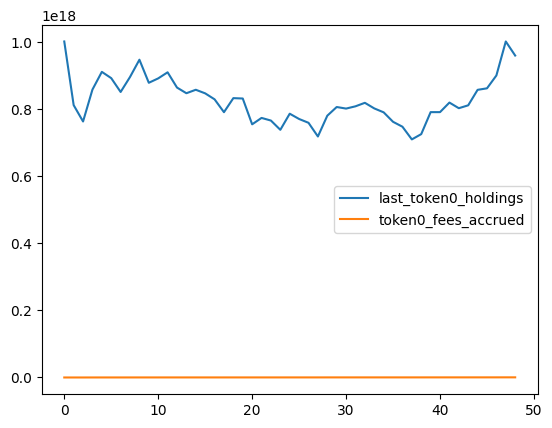

In [22]:
example_pos[['last_token0_holdings', 'token0_fees_accrued']].plot()

<Axes: >

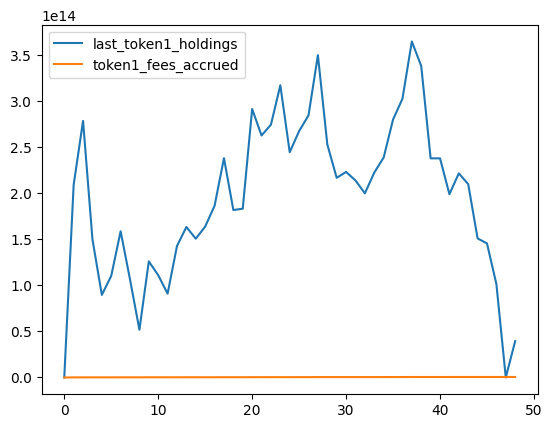

In [23]:
example_pos[['last_token1_holdings', 'token1_fees_accrued']].plot()

In [38]:
FEE = 500 #fee as in contract
TICK_SPACING = 10 #tick spacing as in contract
POOL = pool_name.split(' ')[0] #Pool address, can be a str with anything 
TOKEN0 = POOL.split('/')[0] #Token0 name or address
TOKEN1 = POOL.split('/')[1] #Token1 name or address

clm = ConcentratedLiquidity(TOKEN0, TOKEN1, POOL, fee = FEE, tickSpacing = TICK_SPACING, protocol_fee = 0) #init pool object

In [39]:
pos_dfs = []
k = 0
for i in range(len(df)):
    tdf = df.iloc[i]

    if tdf['event'] == 'Initialize':
        clm.Initialize(sqrtPriceX96 = tdf['args.sqrtPriceX96'], 
                    tick = tdf['args.tick'])

    if tdf['event'] == 'Swap':
        clm.Swap(blockNumber = tdf['blockNumber'],
                transactionIndex = tdf['transactionIndex'],
                logIndex = tdf['logIndex'],
                transactionHash = tdf['transactionHash'],
                sender = tdf['args.sender'],
                recipient = tdf['args.recipient'],
                amount0 = tdf['args.amount0'],
                amount1 = tdf['args.amount1'],
                tick = tdf['args.tick'],
                liquidity = tdf['args.liquidity'])


    if tdf['event'] == 'Collect':
        clm.Collect(tickLower = tdf['args.tickLower'], 
                    tickUpper = tdf['args.tickUpper'], 
                    amount0 = tdf['args.amount0'],
                    amount1 = tdf['args.amount1'],
                    recipient = tdf['args.recipient'],
                    blockNumber = tdf['blockNumber'], 
                    transactionIndex = tdf['transactionIndex'], 
                    logIndex = tdf['logIndex'], 
                    transactionHash = tdf['transactionHash'],
                    tokenId = tdf['tokenId'])
        
    if tdf['event'] == 'Burn':
        clm.Burn(tickLower = tdf['args.tickLower'], 
                tickUpper = tdf['args.tickUpper'], 
                amount = tdf['args.amount'],
                amount0 = tdf['args.amount0'],
                amount1 = tdf['args.amount1'],
                owner = tdf['args.owner'],
                blockNumber = tdf['blockNumber'], 
                transactionIndex = tdf['transactionIndex'], 
                logIndex = tdf['logIndex'], 
                transactionHash = tdf['transactionHash'],
                tokenId = tdf['tokenId'])

    if tdf['event'] == 'Mint':
        clm.Mint(tickLower = tdf['args.tickLower'], 
                tickUpper = tdf['args.tickUpper'], 
                amount = tdf['args.amount'],
                amount0 = tdf['args.amount0'],
                amount1 = tdf['args.amount1'],
                sender = tdf['args.sender'],
                blockNumber = tdf['blockNumber'], 
                transactionIndex = tdf['transactionIndex'], 
                logIndex = tdf['logIndex'], 
                transactionHash = tdf['transactionHash'],
                tokenId = tdf['tokenId'])
        if k >= 1:
            break
        k += 1
    
    pos_dfs.append(clm.positions)

position_df = pd.concat(pos_dfs) #can save for different profit in state
position_df.drop_duplicates(subset=['last_L', 'start_L', 'tickLower', 'tickUpper', 'owner',
                                    'start_token0_holdings', 'start_token1_holdings',
                                    'last_token0_holdings', 'last_token1_holdings', 'token0_fees_accrued',
                                    'token1_fees_accrued', 'token0_collected', 'token1_collected', 'start_logIndex', 
                                    'start_blockNumber', 'start_transactionIndex', 'start_transactionHash',], keep = 'first', inplace = True)

/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:146: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.positions = pd.concat([pos, add_active_df]).reset_index(drop=True)
/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:350: UserWarning: Swap: tick provided does not match calculations

	tick: -89792, -89794
  warnings.warn(f"Swap: tick provided does not match calculations\n\n\ttick: {int(tick)}, {int(tick_next)}")


SwapAllignmentError: Swap: tick provided does not match calculations

	tick: -90031, -89840

In [34]:
tdf

event                                                                                               Swap
logIndex                                                                                              16
transactionIndex                                                                                       1
transactionHash                       0x646e538925af3c89fad715f578de23fefc4179d561da53f1e4dfcd1a77cad639
address                                                       0x68082eCc5bBad8fe77C2Cb9D0e3403D9A00ccBc2
blockHash                             0x4ba84db3a527f79205838ed36f585730662042471f194383188db3bc593f0133
blockNumber                                                                                     12408197
args.sqrtPriceX96                                                          879008433061646898722504704.0
args.tick                                                                                       -90031.0
args.owner                                             

In [37]:
clm.view_all_pool_events()

,event,logIndex,blockNumber,transactionIndex,transactionHash,sender,amount,tickLower,tickUpper,amount0,amount1,tokenId,recipient,tick,liquidity
0,Mint,45,12407941,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.140942e+23,-90400.0,-88800.0,4.001643e+23,5.000000e+19,12127.0,NaN,NaN,NaN
1,Swap,87,12408059,129,0x68a1a4c076d618de9a8fc0deb29fcc882eddcadfe81537369cf1529f8cefb886,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,-7.706628e+21,1.000000e+18,NaN,0xbd82fD42bf9ccFa1Bd97FF9aD9B4fa7D5dD54A25,-89596.0,1.140942e+23
2,Swap,323,12408135,269,0x2a07bfab25f7769db896df63efba265e81d45f36e945e190d38e1040961561c4,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,1.000000e+23,-1.260337e+19,NaN,0xDFee68a9aDb981CD08699891A11CaBE10f25ec44,-89792.0,1.140942e+23
3,Swap,16,12408197,1,0x646e538925af3c89fad715f578de23fefc4179d561da53f1e4dfcd1a77cad639,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,1.233098e+23,-1.520709e+19,NaN,0x5E6732d6416D3f3A6574b61eF1C81316cF8D9287,-90031.0,1.140942e+23


In [24]:
pos = clm.positions

In [25]:
pos

,tokenId,last_L,start_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash,active


In [26]:
tickLower = tdf['args.tickLower']#, 
tickUpper = tdf['args.tickUpper']#, 
amount = tdf['args.amount']#,
amount0 = tdf['args.amount0']#,
amount1 = tdf['args.amount1']#,
sender = tdf['args.sender']#,
blockNumber = tdf['blockNumber']#, 
transactionIndex = tdf['transactionIndex']#, 
logIndex = tdf['logIndex']#, 
transactionHash = tdf['transactionHash']#,
tokenId = tdf['tokenId']

In [28]:
if tokenId in list(pos['tokenId']):
    print('already exists')

In [31]:
add_active_df = pd.DataFrame([[tokenId, float(amount), float(amount), tickLower, tickUpper, sender,
                    float(amount0), float(amount1), float(amount0), float(amount1),
                    float(0),float(0),float(0),float(0),
                    logIndex, blockNumber, transactionIndex, transactionHash,
                    logIndex, blockNumber, transactionIndex, transactionHash, True]],
                    columns = ['tokenId', 'last_L', 'start_L', 'tickLower', 'tickUpper', 'owner', 'start_token0_holdings', 'start_token1_holdings',
                                    'last_token0_holdings', 'last_token1_holdings',
                                    'token0_fees_accrued', 'token1_fees_accrued',
                                    'token0_collected', 'token1_collected',
                                    'start_logIndex', 'start_blockNumber', 'start_transactionIndex', 'start_transactionHash', 
                                    'last_logIndex', 'last_blockNumber', 'last_transactionIndex', 'last_transactionHash', 'active'])

pd.concat([add_active_df, pos]).reset_index(drop=True)

/var/folders/8v/q58b6fr90ns4myxpc0zgqsy40000gn/T/ipykernel_46249/3558719094.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([add_active_df, pos]).reset_index(drop=True)


,tokenId,last_L,start_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash,active
0,12127.0,1.140942e+23,1.140942e+23,-90400.0,-88800.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,4.001643e+23,5.000000e+19,4.001643e+23,5.000000e+19,0.0,0.0,0.0,0.0,45,12407941,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,45,12407941,94,0x3ffd8c90a46c46e64aca90a4f196d92aab6c6d25895d3da448e10693688419b7,True
